<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Recommender_Systems_explicit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
from IPython.display import Image
import numpy.linalg as LA
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


Refer to Prof. Hsieh [class lectures](http://web.cs.ucla.edu/~chohsieh/teaching/CS260_Winter2019/main.html) and [link](http://ethen8181.github.io/machine-learning/). 

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\Tr{\text{Tr}}$

# Recommendation systems

Recommender systems are systems which recommend items (such as movies, books, ads) to users based on various information, such as their past viewing/ purchasing behavior (e.g., which movies they rated high or low, which ads they clicked on), as well as optional “side information” such
as demographics about the user, or information about the content of the item (e.g., its title, genre
or price).

# Explicit feedback
we consider the simplest setting in which the user gives explicit feedback to the
system in terms of a rating: a score from 1 to 5. 

- Let $A_{ui}\in\{1,2,3,4,5\}$ be the rating that user $u$ gives to movie $i$. And $A\in \mb{R}^{M\times N}$ where $M$ is
the number of users, and $N$ is the number of movies. Typically this matrix will be very large but
very sparse, since most users will not provide any feedback on most items. **We will assume the data is missing
at random** because the user has not interacted with that movie. 


- **Netflix Prize:** A famous example of an explicit ratings matrix was made available by the movie streaming company
Netflix. In 2006, they released a large dataset of 100,480,507 movie ratings (on a scale of 1 to 5)
from 480,189 users of 17,770 movies. Despite the large size of the training set, the ratings matrix is
still 99% sparse。 
<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom1.png?raw=true" width="500" />

- **Matrix Factorization Approach:** Suppose we had $d$ topics for
each user and movie. 
   - Describe movie $i$ with topics $H_i$, (How much is it action, romance, drama?) 
$$ H_i = [0.2, 0.01, 0.5]$$

   - Describe user $u$ with topics $W_u$, (How much she/he likes action, romance, drama?)
$$ W_u = [2.5, 0, 0.8]$$   

   - The rating $Y_{ui}$ is the product of the two vectors $H_i, W_u$. 
   
   $$ A_{ui} = W_u H_i^\top = 2.5\times 0.2 + 0.8 \times 0.5 = 0.9$$

   - Recommendations: sort movies user hasn’t watched by the rating $A_{ui}$. 


<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom2.png?raw=true" width="500" />

<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom3.png?raw=true" width="500" />

- Predictions in matrix form. But we don’t
know topics of users and movies.




# Method 1: Direct low rank solutions: Matrix Factorization Approach $A\approx WH^\top$
\begin{align}
\min_{W\in \mb{R}^{M\times k}, H\in \mb{R}^{N\times k}} \sum_{(u,i)\in \Omega}(A_{ui}- W_u H_i^T)^2 + \lambda \left(\|W\|_F^2 + \|H\|_F^2\right)
\end{align}

- $A\in \mb{R}^{M\times N}$  rating matrix.

- $\Omega=\{(u,i)|A_{ui} \text{ is observed. }\}$

- Regularized terms to avoid over-fitting

- In practice, it is important to also allow for user-specific and item-specific baselines, by writing 
$$ A_{ui}=\mu+b_u+c_i +W_u H_i^T$$



Matrix factorization maps users/items to latent feature space $\mb{R}^k$

- $u$-th user, $u$-th row of $W$: $W_u$. 

- $i$-th movie, $i$-th row of $H$: $H_i$.

- $W_uH_i^\top$  measures the interaction between $i$th user and $j$th movie

<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom4.png?raw=true" width="500" />
<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom5.png?raw=true" width="500" />

## Fully observed case: connection to SVD

Assume no regularization and $Y$ is fully observed, the problem becomes
\begin{align}
\min_{W\in \mb{R}^{M\times k}, H\in \mb{R}^{N\times k}} \sum_{(u,i)}(A_{ui}- W_u H_i^T)^2 = \|A-WH^\top\|^2_F
\end{align}

**Solution:** Perform singular value decomposition (SVD) on $A$ and keeps
top $k$ singular values/vectors.

Unfortunately, no closed form solution in partially observed case. So need to solve the optimization problem iteratively. 



## Algorithm 1: ALS: Alternating Least Squares
Objective function $f(W,H)$ is defined as follows
\begin{align}
f(W,H):=\frac{1}{2}\sum_{(u,i)\in \Omega}(A_{ui}- W_u H_i^T)^2 + \frac{1}{2}\lambda \left(\|W\|_F^2 + \|H\|_F^2\right)
\end{align}

Iteratively fix either $H$ or $W$ and optimize the other:
- **Input:** partially observed matrix $A$, initial values of $W$, $H$. 

- For $t=1,2,\dots$

 - Fix $W$ and update $H$: $H\leftarrow \arg\min_H f(W,H) $.

 - Fix $H$ and update $W$: $W\leftarrow \arg\min_W f(W,H) $.





- Define: $\Omega_i = \{u |(u,i)\in \Omega\}$. 

- The subproblem: 
\begin{align}
&\arg\min_H \frac{1}{2}\sum_{(u,i)\in \Omega} (A_{ui}- (W H^T)_{ui})^2 +\frac{1}{2}\lambda \|H\|_F^2 \\
&=\sum_{i=1}^N \arg\min_{H_i}\left(\frac{1}{2}\sum_{(u,i)\in\Omega}(A_{ui} - W_uH^\top_i)^2+\frac{\lambda}{2}\|H_i\|^2\right)
\end{align}

  - $N$ ridge regression problems, each with $k$ variables

  - Easy to parallelize. ($N$ independent ridge regressions)

- The derivative with respect to $W_u$,
\begin{align}
&\frac{\partial}{\partial W_u}\left(\frac{1}{2}\sum_{(u,i)\in\Omega}(A_{ui} - W_uH^\top_i)^2+\frac{\lambda}{2}\|W_u\|^2\right) \\
& = -\sum_{(u,i)\in \Omega}(A_{ui} - W_uH_i^\top)H_i +\lambda W_u = 0
\end{align}  
  In the matrix form, the optimal solution for $W^*$ is  
\begin{align}
&W_u^* (H^\top H+\lambda I)=  A_uH \\
&W_u^* = A_uH(H^\top H+\lambda I)^{-1}\\
&W^* = AH(H^\top H+\lambda I)^{-1}
\end{align}  

- The derivative with respect to $H_i$,
\begin{align}
&\frac{\partial}{\partial H_i}\left(\frac{1}{2}\sum_{(u,i)\in\Omega}(A_{ui} -  H_iW_u^\top)^2+\frac{\lambda}{2}\|H_i\|^2\right) \\
& = -\sum_{(u,i)\in \Omega}(A_{ui} - H_iW_u^\top)W_u +\lambda H_i = 0
\end{align}

  In the matrix form, the optimal solution for $H^*$ is  
\begin{align}
&H^*_i(W^\top W+\lambda I )= (A^\top)_i W\\
&H^*_i = (A^\top)_i W(W^\top W+\lambda I )^{-1}\\
&H^* =A^\top W(W^\top W+\lambda I )^{-1}
\end{align}  





## Algorithm 2: Stochastic Gradient Descent 
- $n_u^W$: number of nonzeroes in the $u$-th row of $A$.

- $n_i^H$: number of nonzeroes in the $i$-th column of $A$.

- Decompose the problem into $\Omega$ components:
\begin{align}
f(W,H) & =\frac{1}{2}\sum_{(u,i)\in \Omega}(A_{ui}- W_u H_i^T)^2 + \frac{1}{2}\lambda \left(\|W\|_F^2 + \|H\|_F^2\right)\\
&= \sum_{(u,i)\in\Omega}\left(\frac{1}{2}(A_{ui}- W_u H_i^T)^2+\frac{\lambda}{2}\|W_u\|_2^2+\frac{\lambda}{2}\|H_i\|_2^2\right)
\end{align}
The gradient of each component:
\begin{align}
&\nabla_{W_u}f_{u,i}(W,H)= (W_u H_i^T - A_{ui})H_i + \lambda W_u \\
& \nabla_{H_i}f_{u,i}(W,H)= (W_u H_i^T - A_{ui})W_u + \lambda H_i
\end{align}

### Algorithm
- **Input:** partially observed matrix $A$, initial values of $W$ , $H$. 

- For $t = 1, 2,\dots$, 
  
  - Randomly pick a pair $(i,j)\in \Omega$.

  - $W_u \leftarrow (1-\eta_t \lambda)W_u -\eta_t (W_uH_i^\top -A_{ui})H_i$

  - $H_i \leftarrow (1-\eta_t \lambda)H_i -\eta_t (W_uH_i^\top -A_{ui})W_u$



**Time complexity:** $O(k)$ per iteration; $O(|\Omega|k)$ for one pass of all observed entries. 

### Parallelize SGD

- Two SGD update on $(u_1, i_1)$ and $(u_2, i_2)$ in the same time:

   - $(u_1, i_1)$ Updates $W_{u_1}$ and $H_{i_1}$. 

   - $(u_2, i_2)$ Updates $W_{u_2}$ and $H_{i_2}$. 

   - Confliction happens when $u_1=u_2$ or $i_1=i_2$.

How to avoid conflict?  Gemulla et al., “Large-Scale Matrix Factorization with Distributed Stochastic Gradient Descent”.  

<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom_SGD1.png?raw=true" width="600" />

<br>
<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom_SGD2.png?raw=true" width="200" />
<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom_SGD3.png?raw=true" width="200" />
<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/recom_SGD4.png?raw=true" width="200" />



# Method 2: Matrix-norm	Minimization
Previously, we need to specify the dimension of the latent feature space $k$ and this is not a convex problem so there are many local optima.

We can rephase this problem to the following 
\begin{align}
\min_{\Theta} \text{rank}(\Theta), \ \ \ \text{subject to } \Theta_{ui} = A_{ui} \text{ for } (u,i)\in \Omega. 
\end{align}

The issue is: 
- it is NP-hard!!

- You cannot hope to get exact matching. 

- Previous approach is kind of relaxation of this problem. 

### Eigenvalue	Decompositions	for	PSD	Matrices

Given a PSD matrix $\m{M}\in \mb{R}^{D\times D}$, by definition, eigenvalues $\lambda_i\ge 0$ for $i=1,\dots, D$.

- $\text{rank}(\m{M})=|\{\lambda_i: \lambda_i\ge 0\}|=\|\vec\lambda\|_0$. 

- We can use 1-norm to approximate, i.e., $\|\vec\lambda\|_0\approx \|\vec\lambda\|_1=\sum_{i=1}^D|\lambda_i|=\text{trace}(\m{M})$. 

- If $A$ is PSD, then 
\begin{align}
\min_{\Theta} \text{rank}(\Theta)= \|\vec\lambda\|_0,\ \  \text{subject to } \Theta_{ui}=A_{ui}, \Theta\ge 0, \text{ for } (u,i)\in \Omega.
\end{align}
is approximated by 
\begin{align}
\min_{\Theta} \text{Trace}(\Theta)= \|\vec\lambda\|_1,\ \  \text{subject to } \Theta_{ui}=A_{ui}, \Theta\ge 0, \text{ for } (u,i)\in \Omega.
\end{align}

- For PSD matrix, eigenvalue decompsition and Singular value decomposition are the same. $\m{M}=P\Lambda P^{-1}=U\Sigma V^\top$. For rectangular matrices, diagonal matrix with entries $\sigma_i(\Theta)\ge 0$. So we can use the nuclear norm of $\Theta$ to approximate, i.e, 
\begin{align}
\min_{\Theta} \|\Theta\|_*=\sum_{i=1}^D \sigma_i(\Theta),\ \  \text{subject to } \Theta_{ui}=A_{ui}, \text{ for } (u,i)\in \Omega.
\end{align}
 It is a convex problem!!

- Again there may not be feasible solution. We will further relax to 
\begin{align}
\min_{\Theta}\sum_{(u,i)\in \Omega}(A_{ui}- \Theta_{ui})^2 + \lambda \|\Theta\|_* 
\end{align}
 It is again a convex problem and can be solved by semidefinite programming. 


- Theorem: (Candes, Recht 08)
   - If	there	is	a	true	matrix	of	rank $k$ and has the size of $N\times M$ and assume $N>M$. 

   - And, we observe at least $CkN^{1.2}\log(N)$ random entries of the true matrix. 

   - (Under certain conditions) True matrix is recovered exactly with high probability via convex nuclear norm minimization. The solution is unique. 







## Comparison 
- Nuclear	Norm	Minimization
\begin{align}
\min_{\Theta}\sum_{(u,i)\in \Omega}(A_{ui}- \Theta_{ui})^2 + \lambda \|\Theta\|_* 
\end{align}
   - Pro: Convex, global optimal, close to truth. 

   - Con: SDP solvers are very slow when $\Theta$ is very large (like Netflix Prize). It is still in polynomial time. 

- Direct low rank solutions
\begin{align}
\min_{W\in \mb{R}^{M\times k}, H\in \mb{R}^{N\times k}} \sum_{(u,i)\in \Omega}(A_{ui}- W_u H_i^T)^2 + \lambda \left(\|W\|_F^2 + \|H\|_F^2\right)
\end{align}

  - Pro: No. of parameters are smaller and has very fast solvers. 

  - Con: Many local optimal.


- Connection (Burer Monterio 04)
  - $$\|\Theta\|_*=\left\{\min_{W, H} \frac{1}{2}\|W\|_F^2 + \frac{1}{2}\|H\|_F^2: \Theta= WH^\top \right\} $$ 

  - Direct low rank solutions is a non-convex approximatin of Nuclear	Norm	Minimization. 

  - If we pick rank $k$ to be slightly larger than $\text{rank}(\Theta)$, the local optima of Direct low rank solutions is actually global optima in Nuclear	Norm	Minimization with high probability. 


# Method 3: Nonnegative Matrix Factorization

In the description, we would like to have $W$ and $H$ to be nonnegative matrices. 
- $W$: how much the user like for each topic

- $H$: how much the item/movie contributes to a topic. 

But both method above can result negative entries. 
Now it becomes a constrained optimization problem.  

\begin{align}
\min_{W\in \mb{R}^{M\times k}, H\in \mb{R}^{N\times k}} \frac{1}{2}\sum_{(u,i)\in \Omega}(A_{ui}- W_u H_i^T)^2 + \frac{\lambda}{2} \left(\|W\|_F^2 + \|H\|_F^2\right), \text{ subject to } W\ge 0, H\ge 0. 
\end{align}

### Algorithm: Projected	Gradient

<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/proj.png?raw=true" width="300" />

- Standard optimization: 
  - want to minimize: $\min_{\Theta}f(\Theta)$

  - In stochastic gradient descent method 
  $$\Theta^{(t+1)} \leftarrow \Theta^{(t)}-\eta_t\nabla f(\Theta^{(t)}) $$


- Constrained	optimization:  
   
    - Given	convex	set	$C$	of	feasible	solutions.

    - Want to find optima within $C$: $\min_{\Theta\in C}f(\Theta)$. 

- Projected gradient: 
  - Take a gradient step and ignore constraints 
  $$\tilde \Theta^{(t+1)} \leftarrow \Theta^{(t)}-\eta_t\nabla f(\Theta^{(t)}) $$

  - Project into feasible set: it is always convex and often easy to compute
  $$\Pi_c(\theta)=\arg\min_{\beta\in C}\|\theta-\beta\|_2^2 $$
  $$ \Theta^{(t+1)}= \Pi_c(\tilde \Theta^{(t+1)})$$


**Input:** partially observed matrix $A$, initial values of $W$ , $H$. 

- For $t = 1, 2,\dots$, 
  
  - Randomly pick a pair $(i,j)\in \Omega$.

  - $\tilde W_u \leftarrow (1-\eta_t \lambda)W_u -\eta_t (W_uH_i^\top -A_{ui})H_i$

  - $W_u = (\tilde W_u)_{+}$, i.e., set all negative coordinate to 0. 

  - $\tilde H_i \leftarrow (1-\eta_t \lambda)H_i -\eta_t (W_uH_i^\top -A_{ui})W_u$

  - $H_i = (\tilde H_i)_{+}$, i.e., set all negative coordinate to 0. 


  
### Algorithm: Lee and Seung's multiplicative update rule
The optimization problem is equivalent with the following matrix form 
\begin{align}
\min_{W\in \mb{R}^{M\times k}, H\in \mb{R}^{N\times k}} \|A-WH^\top\|_F^2 + \lambda \left(\|W\|_F^2 + \|H\|_F^2\right), \text{ subject to } W\ge 0, H\ge 0. 
\end{align}

Some background knowledge:

- $\|X\|_F^2 = \Tr(X^\top X) $

- $\nabla_X\Tr(AX)=A^\top$

- $\nabla_X\Tr(XA^\top)=A$

- $ \nabla_X\Tr(XAX^\top)=X(A+A^\top)$

Note 
\begin{align}
\|A-WH^\top\|_F^2 &= \Tr\left((A-WH^\top)^\top (A-WH^\top)\right) \\
& = \Tr(A^\top A -A^\top WH^\top - HW^\top A+ HW^\top WH^\top ) \\
& = \Tr(A^\top A) - \Tr(A^\top WH^\top) - \Tr(HW^\top A)+\Tr(HW^\top WH^\top)
\end{align}
The non-negative matrix factorization problem is non-convex in $W$ and $H$ but it is convex in only $W$ or only $H$. To optimize the above problem, we use a block coordinate descent scheme where we optimize with respect to $W$ first while keeping $H$ fixed and then vice versa.
\begin{align}
&1. \nabla_W \Tr(A^\top WH^\top) =\nabla_W \Tr(H^\top A^\top W) = (H^\top A^\top)^\top = AH \\
&2. \nabla_W \Tr(HW^\top A) = \nabla_W \Tr(W^\top AH) = AH \\
&3. \nabla_W\Tr(HW^\top WH^\top) = \nabla_W\Tr(WH^\top HW^\top) =2WH^\top H 
\end{align}

The derivatives with respect to $H$ can computed similarly. So
\begin{align}
&\nabla_W f(W,H) = -AH + WH^\top H + \lambda W = (WH^\top-A) H+ \lambda W \\
&\nabla_H f(W,H) = -W^\top A + W^\top WH^\top +\lambda H  =W^\top(WH^\top-A) +\lambda H
\end{align}

Using the above derivatives,
\begin{align}
&W \leftarrow (1-\eta_W \lambda) W-\eta_W(WH^\top-A) H\\
&H\leftarrow (1-\eta_H \lambda) H- \eta_H W^\top(WH^\top-A)
\end{align}

Traditionally in gradient descent, the learning rates are positive but since the subtraction of terms in the update rules can lead to negative elements. 

Lee and Seung proposed to use *adaptive learning rates* to avoid subtraction and thus the production of negative elements. The learning rates are defined in such a way that there is no subtraction in the update rules. 

If we set 
$$ \eta_{W_{ij}} = \frac{W_{ij}}{\lambda W_{ij} + (WH^\top H)_{ij}}$$
$$\eta_{H_{ij}} =\frac{H_{ij}}{\lambda H_{ij} + (W^\top W H^\top)_{ij}}$$
we arrive at the given update rules.
$$ W_{ij}\leftarrow \frac{W_{ij} (AH)_{ij}}{\lambda W_{ij} + (WH^\top H)_{ij}}$$
$$H_{ij} \leftarrow \frac{H_{ij}(W^\top A)_{ij}}{\lambda H_{ij} + (W^\top W H^\top)_{ij}}  $$
Note that the updates are done on an element by element basis not matrix multiplication. 

Note that the multiplicative factors for $W$ and $H$, then $\frac{(AH)_{ij}}{(WH^\top H)_{ij}}$ and $\frac{(W^\top A)_{ij}}{(W^\top W H^\top)_{ij}}$ are ones, when $A = W H^\top$.



---


**Input:** partially observed matrix $A$, initial values of non-negative $W$ , $H$: 

Update the values in $W$ and $H$ by computing the following, with $t$ as an index of the iteration.

- For $t = 1, 2,\dots$,
  - $ W_{ij}^{(t+1)}\leftarrow \frac{W_{ij}^{(t)} (AH^{(t)})_{ij}}{\lambda W^{(t)}_{ij} + (W^{(t)}(H^{(t)})^\top H^{(t)})_{ij}}$

  - $H_{ij}^{(t+1)} \leftarrow \frac{H_{ij}^{(t)}((W^{(t+1)})^\top A)_{ij}}{\lambda H^{(t)}_{ij} + ((W^{(t+1)})^\top W^{(t+1)} (H^{(t)})^\top)_{ij}}  $

  - Until $W^{(t)}$ and $H^{(t)}$ are stable.




# Method 4: Feature-based recommendation: Matrix completion with features
we have assumed that the only information available to the predictor are the integer id of the
user and the integer id of the item/movie. This is an extremely impoverished representation, and will fail to work if we encounter a new user or new item (the so-called **cold start** problem). To overcome this, we need to leverage “side information”, beyond just the id of the user/item.

**Input:**  rating matrix $A\in \mb{R}^{M\times N}$, user feature $X\in \mb{R}^{M\times d_1}$ and item feature $Y\in \mb{R}^{N\times d_2}$. 

**Goal:** predict unknown ratings.
## Inductive Matrix Completion (IMC)
$$ A \approx XWH^\top Y^\top$$
where $X\in \mb{R}^{M\times d_1}, W\in \mb{R}^{d_1\times k}, H\in \mb{R}^{d_2\times k}, Y\in \mb{R}^{N\times d_2}$. Note here $W$ and $H$ are independent with number of users and items.

The optimization problem becomes
\begin{align}
\min_{W\in \mb{R}^{d_1\times k}, H\in \mb{R}^{d_2\times k}} \frac{1}{2}\sum_{(u,i)\in \Omega}(A_{ui}- X_u W H^\top Y_i^\top)^2 + \frac{\lambda}{2} \left(\|W\|_F^2 + \|H\|_F^2\right)
\end{align}
- $X_u$ is the feature for user $u$ and $Y_i$ is the feature for user $i$. 

- $X_uW\in \mb{R}^k$: $k$-dimensional embedding of user $u$.

- $H^\top Y_i^\top \in \mb{R}^k$: $k$-dimensional embedding of item $i$.

- Inner product in the $k$-dimensional embedding space gives the predicted value. 

## Factorization machine 
Observation: Recommendation systems can be transformed to classification or regression.
$$(u,i, A_{ui}) \Rightarrow (\m{z}^{(u,i)}, A_{ui}) $$
where $\m{z}^{(i,j)}$ is the feature extracted for user $u$ and item $i$. 

Example: $\m{z}^{(u,i)}=[X_u, Y_i]$ 

<img src="https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/fact.png?raw=true" width="600" />

## Coding example: MovieLens

We start by loading some sample data to make this a bit more concrete. For this introduction, we'll be using the MovieLens dataset. The website has datasets of various sizes, but we just start with the smallest one MovieLens 100K Dataset. This dataset consists of 100,000 movie ratings by users (on a 1-5 scale). The main data set u.data file consists of four columns (tab-delimited), including user-id (starting at 1), item-id (starting at 1), rating, and timestamp (we won't be using this field).



In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -O ml-100k.zip

--2022-02-24 03:46:37--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.2MB/s    in 0.4s    

2022-02-24 03:46:38 (11.2 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [ ]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = names)
print(df.shape)
df.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


As we can see, the only data that we have is how each user interacted or rated each item. Given this information, collaborative filtering will start by constructing a user-item matrix with each distinct user being the row, item being the column and the value for each cell will simply be the rating that the user gave to the item. Apart from building the matrix, we will also print out some other information to help us understand our data a bit better.



In [ ]:
# create the rating matrix A_{ui}, remember to
# subract the user and item id by 1 since
# the indices starts from 0
n_users = df['user_id'].unique().shape[0]
n_items = df['item_id'].unique().shape[0]
A = np.zeros((n_users, n_items)) # we are not using sparsity here. 
for row in df.itertuples(index = False):
    A[row.user_id - 1, row.item_id - 1] = row.rating

# compute the non-zero elements in the rating matrix
matrix_size = np.prod(A.shape)
interaction = np.flatnonzero(A).shape[0]
sparsity = 100 * (interaction / matrix_size)

print(f'dimension: {A.shape}')
print(f'sparsity: {sparsity}%')
A


dimension: (943, 1682)
sparsity: 6.304669364224531%


array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

From the information above, we know there are 943 unique users, 1682 unique items. Within the rating matrix, only 6.3% of the cells have a value, although we filled in empty ratings as 0, we should not assume these values to truly be zero. More appropriately, they are just missing entries. This kind of sparsity is extremely common in recommendation system, where people seldom give ratings to things that they have purchased. One thing to note is that if the sparsity of the matrix is below 1% (rule of thumb), then the dataset might be too sparse to perform any sort of modeling.

One tricky thing about splitting the data into training and testing is that: In supervise machine learning we normally build the training and testing holdout set by randomly splitting the rows. In those cases, this idea works, because we have a model with features/target that we are trying to fit a function to. For recommender systems with collaborative filtering (no features), this just won't work anymore, because all of the items/users need to be available when the model is first built. So what we do instead is mask a random sample of the user/item ratings to validate and compare how well the recommender system did in predicting the ratings of those masked values. In our case, given we already know each user has given more than 10 ratings, what we'll do is for every user, we remove 10 of the item ratings and and assign them to the test set. The testing matrix is printed below, as hopefully, you can see that some of the values are indeed different from the original rating matrix.



In [ ]:
def create_train_test(A):
    """
    split into training and test sets,
    remove 10 ratings from each user
    and assign them to the test set
    """
    test = np.zeros(A.shape)
    train = A.copy()
    for user in range(A.shape[0]):
        test_index = np.random.choice(
            np.flatnonzero(A[user]), size = 10, replace = False)

        train[user, test_index] = 0.0
        test[user, test_index] = A[user, test_index]
        
    # assert that training and testing set are truly disjoint
    assert np.all(train * test == 0)
    return train, test

train, test = create_train_test(A)

In [ ]:
class MF_ALS:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix
    
    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm
        
    n_factors : int
        number of latent factors to use in matrix 
        factorization model, some machine-learning libraries
        denote this as rank
        
    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  

    def _als_step(self, ratings, fixed_matrix):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_matrix.T.dot(fixed_matrix) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_matrix)
        
        solve_matrix =np.linalg.solve(A,b.T).T
        return solve_matrix


    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred    

    def compute_mse(self, train, pred):
        """ignore zero terms prior to comparing the mse"""
        train_ravel = train.ravel()
        pred_ravel  = pred.ravel()
        mask = np.nonzero(train_ravel)
        mse = np.sqrt(np.sum( (train_ravel[mask]- pred_ravel[mask])**2 )/shape(mask)[1])
        return mse

    def fit(self, train):
        """
        pass in training to record
        model convergence, assuming  dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))
        
        # record the training  for every iteration
        # to show convergence later
        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train,   self.item_factors)
            self.item_factors = self._als_step(train.T, self.user_factors) 
            pred = self.predict()
            train_mse = self.compute_mse(train, pred)
            self.train_mse_record.append(train_mse)
        
        return self    


    def validation(self, test):
        """ 
        pass in testing to validate the performance of test data.
        """
        pred = self.predict()
        test_mse = self.compute_mse(test, pred)
        print(f'MSE for testing data is {test_mse}')

        return test_mse  


    
         





In [ ]:
def plot_learning_curve(model):
        """visualize the training/testing loss"""
        linewidth = 3
        plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
        plt.xlabel('iterations')
        plt.ylabel('MSE')
        plt.legend(loc = 'best') 

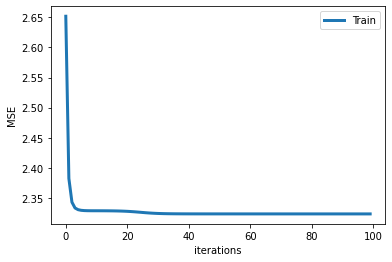

In [ ]:
als = MF_ALS(n_iters = 100, n_factors = 20, reg = 0.01)
als.fit(train)
plot_learning_curve(als)

In [ ]:
als.validation(test)

MSE for testing data is 2.8405692625899395


2.8405692625899395

In [ ]:
n_factors_span = arange(10,30)
testing_MSE_store = zeros(len(n_factors_span))
for i, n_factors_i in enumerate(n_factors_span):
  als = MF_ALS(n_iters = 50, n_factors = n_factors_i, reg = 0.01)
  als.fit(train)
  testing_MSE_store[i]=als.validation(test)




MSE for testing data is 2.8405644280234226
MSE for testing data is 2.835107285194301
MSE for testing data is 2.8286890132778963
MSE for testing data is 2.8228569248447943
MSE for testing data is 2.821470851858986
MSE for testing data is 2.819089228632184
MSE for testing data is 2.8161712382713158
MSE for testing data is 2.81710310928307
MSE for testing data is 2.8165245762804454
MSE for testing data is 2.8164192396570464
MSE for testing data is 2.8170657239208294
MSE for testing data is 2.8183446951732822
MSE for testing data is 2.821035117190946
MSE for testing data is 2.8235649008709474
MSE for testing data is 2.825005868079568
MSE for testing data is 2.8266812688275826
MSE for testing data is 2.831181544932907
MSE for testing data is 2.8348084408810124
MSE for testing data is 2.837470150505845
MSE for testing data is 2.8406120647270314


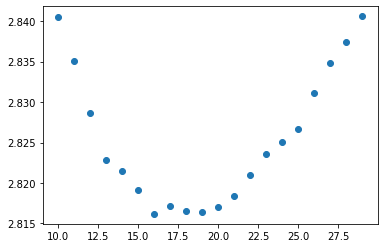

In [ ]:
scatter(n_factors_span, testing_MSE_store)